In [1]:
# -*- encoding: utf8 -*-
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch import nn
import os
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Detect_abnormal_leaves
from myCNN_2 import Net  

PROJECT_PATH='./'
DATA_TEST = os.path.join(PROJECT_PATH, "Abnormal_Leaves_Database/test")
model_path = os.path.join(PROJECT_PATH, "Detect_abnormal_leaves.pth")

def get_transform():
    return transforms.Compose([
            # 32 x 32
            transforms.Resize(32),
            transforms.CenterCrop(32),
            transforms.ToTensor(),
            # Normalize
            transforms.Normalize(mean=[0.4, 0.4, 0.4],
                                  std=[0.2, 0.2, 0.2])
        ])

def get_dataset(batch_size=10, num_workers=1):
    data_transform = get_transform()
    # load train_dataset
    # train_dataset = ImageFolder(root=DATA_TRAIN, transform=data_transform)
    # load test_dataset
    test_dataset = ImageFolder(root=DATA_TEST, transform=data_transform)
    # train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
    return test_loader

test_dataloader = get_dataset(batch_size=10)
# use model to test another database
model = Net()
model.load_state_dict(torch.load(model_path))
print('Load CNN model from Detect_abnormal_leaves.pth!')
# 测试加载的模型
# Report the final classification performance
model.eval() # 评估模式
correct = 0
total = 0
predictions = []
true_labels = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        # print(f"predicted:{predicted}\n")
        # print(f"labels:{labels}\n")
        correct += (predicted == labels).sum().item()
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy = correct / total
print(f'Accuracy of CNN classification: {accuracy * 100:.2f}%')


Accuracy of CNN classification: 84.62%


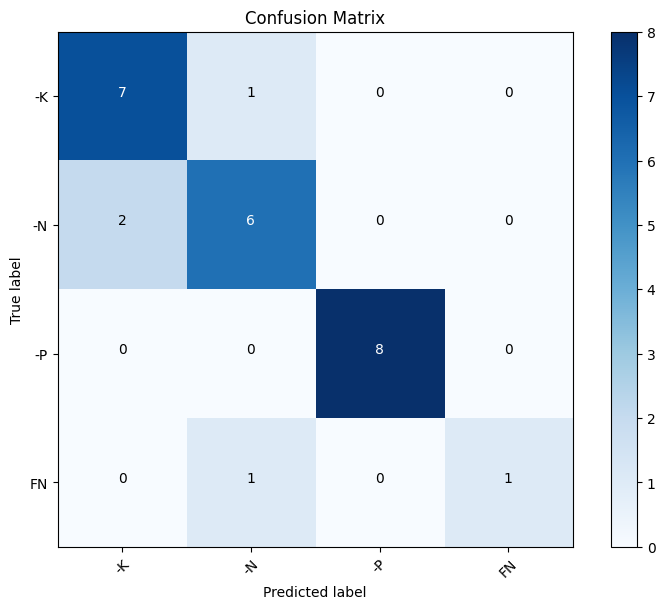

In [2]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
# 'Class 0', 'Class 1', 'Class 2' seedling growing mature
classes = ['-K', '-N', '-P','FN']  # Adjust based on your classes
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                horizontalalignment="center",
                color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [3]:
import matplotlib.patches as patches

# 数据集路径和预测结果保存路径
# DATA_TEST = '/Users/alina./CODE/EE5003/program_final/CNN/CNN_database/test_filter'
SAVE_PATH = './predicted_result'

# 加载测试数据集
test_dataset = ImageFolder(root=DATA_TEST, transform=None)

# 遍历测试数据集并绘制预测结果
for i, (image, label) in enumerate(test_dataset):
    image = image.resize((100, 100))
    # 模拟预测结果，这里假设预测结果与真实标签一致
    predicted_label = predictions[i]
    
    # 创建图形和坐标轴
    fig, ax = plt.subplots(figsize=(1, 1)) 
    ax.imshow(image)
    
    # 根据类别设置矩形框的颜色
    if predicted_label == 0:
        rect_color = 'orange'
        predicted_text = '-K'
    elif predicted_label == 1:
        rect_color = 'blue'
        predicted_text = '-N'
    elif predicted_label == 2:
        rect_color = 'red'
        predicted_text = '-P'
    else:
        rect_color = 'black'
        predicted_text = 'FN'

    
    # 创建矩形框并添加到坐标轴上
    rect = patches.Rectangle((5, 5), 90, 90, linewidth=1, edgecolor=rect_color, facecolor='none')
    ax.add_patch(rect)
    
    # 设置坐标轴不可见
    ax.axis('off')
    # plt.text(0, -5, f'Predicted Label: {predicted_label}, True: {label}', color=rect_color, fontsize=5, ha='left')
    plt.text(0, -5, f'Predicted: {predicted_text}', color=rect_color, fontsize=6, ha='left')
    # 保存结果图像
    save_filename = os.path.join(SAVE_PATH, f"CNNpredicted_image_{i}.png")
    fig.savefig(save_filename, dpi=100) 
    plt.close()  # 关闭图形以释放内存
print('Saved predicted result into predicted_result file!')

Saved predicted result into predicted_result file!
